In [39]:
import json
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

RESULTS_PATH = "results/rag_results_judged.jsonl"  # change if needed
# Load summary
df = pl.read_ndjson(RESULTS_PATH)

df

item_index,model_name,prompt_variant,context_condition,question,gold_answer,context,documents,system_prompt,user_prompt,model_answer,llm_correct,llm_score,llm_raw_judgment
i64,str,str,str,str,str,str,list[struct[2]],str,str,str,bool,f64,str
0,"""llama2:7b""","""langchain_base""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]","""You are an assistant for quest…","""Use the following pieces of re…","""Mitochondria's primary functio…",true,1.0,"""{ ""correct"": true, ""score""…"
0,"""llama2:7b""","""langchain_system""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]","""You are an assistant for quest…",null,"""The primary function of the mi…",true,1.0,"""{ ""correct"": true, ""score""…"
0,"""llama2:7b""","""langchain_user""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]",null,"""You are an assistant for quest…","""The primary function of mitoch…",true,1.0,"""{ ""correct"": true, ""score""…"
0,"""llama2:7b""","""llamaindex_base""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]","""If you don't know the answer, …","""We have provided context infor…","""The primary function of mitoch…",true,1.0,"""{ ""correct"": true, ""score""…"
0,"""llama2:7b""","""llamaindex_system""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]","""If you don't know the answer, …",null,"""The primary function of the mi…",true,1.0,"""{ ""correct"": true, ""score""…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…
19,"""qwen3:4b""","""claude_rag_system""","""mixed""","""What device measures atmospher…","""A barometer measures atmospher…","""Orange juice contains high lev…","[{""Orange juice contains high levels of vitamin C."",""irrelevant""}, {""The Amazon River flows eas

In [40]:
df2 = pl.read_json("results/metric_scores.json")

df2

item_index,model_name,prompt_variant,context_condition,question,gold_answer,context,documents,system_prompt,user_prompt,model_answer,reference_answers,rougeL_precision,rougeL_recall,bleu,bert_score_precision,bert_score_recall
i64,str,str,str,str,str,str,list[struct[2]],str,str,str,list[str],f64,f64,f64,f64,f64
0,"""llama2:7b""","""langchain_base""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]","""You are an assistant for quest…","""Use the following pieces of re…","""Mitochondria's primary functio…","[""The mitochondria produce ATP and serve as the cell’s primary source of energy.""]",0.272727,0.214286,0.443802,0.39534,0.525854
0,"""llama2:7b""","""langchain_system""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]","""You are an assistant for quest…",null,"""The primary function of the mi…","[""The mitochondria produce ATP and serve as the cell’s primary source of energy.""]",0.25,0.285714,0.476672,0.461514,0.58103
0,"""llama2:7b""","""langchain_user""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]",null,"""You are an assistant for quest…","""The primary function of mitoch…","[""The mitochondria produce ATP and serve as the cell’s primary source of energy.""]",0.347826,0.571429,0.394444,0.427413,0.619366
0,"""llama2:7b""","""llamaindex_base""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]","""If you don't know the answer, …","""We have provided context infor…","""The primary function of mitoch…","[""The mitochondria produce ATP and serve as the cell’s primary source of energy.""]",0.266667,0.285714,0.466481,0.449255,0.573878
0,"""llama2:7b""","""llamaindex_system""","""relevant_only""","""What is the primary function o…","""The mitochondria produce ATP a…","""Mitochondria are membrane-boun…","[{""Mitochondria are membrane-bound organelles responsible for producing ATP, the cell's main energy currency."",""relevant""}, {""Cells rely on mitochondria to convert nutrients into usable energy through the process of oxidative phosphorylation."",""relevant""}, {""The mitochondria support cellular respiration, enabling the cell to perform functions requiring energy."",""relevant""}]",

In [41]:
df.select(pl.mean("llm_score"))

llm_score
f64
0.789063


In [42]:
llm_score_df = df.group_by(["prompt_variant", "context_condition"], maintain_order=True).agg(
        pl.col("llm_score").mean().alias("mean"),
        pl.col("llm_score").std().alias("std"),
        (1.96 * pl.col("llm_score").std() / pl.col("llm_score").len().sqrt()).alias("ci")
    )
llm_score_df

prompt_variant,context_condition,mean,std,ci
str,str,f64,f64,f64
"""langchain_base""","""relevant_only""",0.71625,0.433836,0.095068
"""langchain_system""","""relevant_only""",0.9125,0.284349,0.062311
"""langchain_user""","""relevant_only""",0.77375,0.412385,0.090368
"""llamaindex_base""","""relevant_only""",0.7425,0.435389,0.095409
"""llamaindex_system""","""relevant_only""",0.8875,0.317974,0.069679
…,…,…,…,…
"""claude_rag_system""","""mixed""",0.95,0.21932,0.048061
"""claude_rag_user""","""mixed""",0.92,0.261156,0.057228
"""mastra_cot_base""","""mixed""",0.92,0.26164,0.057334


In [43]:
llm_score_df["prompt_variant"].value_counts(sort=True)["prompt_variant"]

prompt_variant
str
"""langchain_base"""
"""langchain_system"""
"""langchain_user"""
"""llamaindex_base"""
"""llamaindex_system"""
…
"""claude_rag_system"""
"""claude_rag_user"""
"""mastra_cot_base"""


In [44]:
llm_score_df.filter(pl.col("context_condition") == "relevant_only")["mean"]

mean
f64
0.71625
0.9125
0.77375
0.7425
0.8875
…
0.95
0.9125
0.975


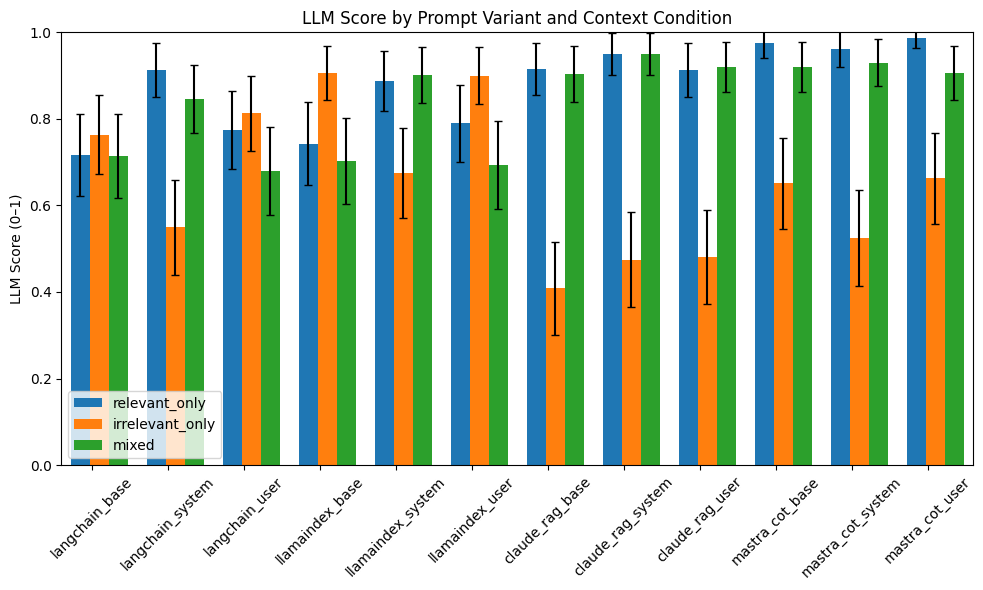

In [45]:
x = np.arange(llm_score_df["prompt_variant"].n_unique())
width = 0.25  # width of each bar
plt.figure(figsize=(10, 6))

# -------- SCORE PLOT --------
conditions = ["relevant_only", "irrelevant_only", "mixed"]
offset = -width
for cond in conditions:
    item = llm_score_df.filter(pl.col("context_condition") == cond)
    plt.bar(x + offset, item["mean"], width, label=cond)
    plt.errorbar(
        x + offset,
        item["mean"],
        yerr=item["ci"],
        fmt="None",
        capsize=3,
        color="black"
    )

    offset += width

tick_positions = x
plt.xticks(tick_positions - 0.1, llm_score_df["prompt_variant"].value_counts(sort=True)["prompt_variant"].to_list(), rotation=45)
plt.xlim(min(x) - 0.5, max(x) + 0.5)
plt.ylim(0, 1)
plt.ylabel("LLM Score (0–1)")
plt.title("LLM Score by Prompt Variant and Context Condition")
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
llm_bleu_df = df2.group_by(["prompt_variant", "context_condition"], maintain_order=True).agg(
        pl.col("bleu").mean().alias("mean"),
        pl.col("bleu").std().alias("std"),
        (1.96 * pl.col("bleu").std() / pl.col("bleu").len().sqrt()).alias("ci")
    )
llm_bleu_df

prompt_variant,context_condition,mean,std,ci
str,str,f64,f64,f64
"""langchain_base""","""relevant_only""",0.450149,0.332532,0.072869
"""langchain_system""","""relevant_only""",0.386263,0.360999,0.079107
"""langchain_user""","""relevant_only""",0.495134,0.324701,0.071153
"""llamaindex_base""","""relevant_only""",0.449033,0.345213,0.075648
"""llamaindex_system""","""relevant_only""",0.343761,0.373567,0.081862
…,…,…,…,…
"""claude_rag_system""","""mixed""",0.3705,0.325404,0.071307
"""claude_rag_user""","""mixed""",0.552394,0.327978,0.071871
"""mastra_cot_base""","""mixed""",0.532439,0.334342,0.073266


In [48]:
import tikzplotlib

ImportError: cannot import name 'common_texification' from 'matplotlib.backends.backend_pgf' (/home/kojo/Code/RAGBE/ragenv/lib/python3.12/site-packages/matplotlib/backends/backend_pgf.py)

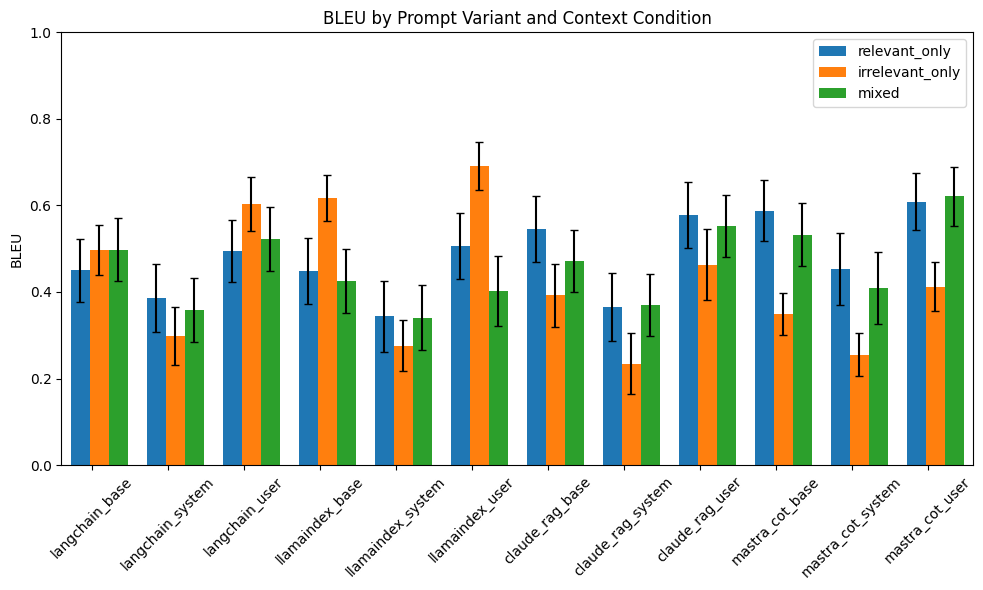

In [38]:
x = np.arange(llm_bleu_df["prompt_variant"].n_unique())
width = 0.25  # width of each bar
plt.figure(figsize=(10, 6))

# -------- ACCURACY PLOT --------
conditions = ["relevant_only", "irrelevant_only", "mixed"]
offset = -width
for cond in conditions:
    item = llm_bleu_df.filter(pl.col("context_condition") == cond)
    plt.bar(x + offset, item["mean"], width, label=cond)
    plt.errorbar(
        x + offset,
        item["mean"],
        yerr=item["ci"],
        fmt="None",
        capsize=3,
        color="black"
    )

    offset += width

tick_positions = x
plt.xticks(tick_positions - 0.1, llm_bleu_df["prompt_variant"].value_counts(sort=True)["prompt_variant"].to_list(), rotation=45)
plt.xlim(min(x) - 0.5, max(x) + 0.5)
plt.ylim(0, 1)
plt.ylabel("BLEU")
plt.title("BLEU by Prompt Variant and Context Condition")
plt.legend()
plt.tight_layout()
plt.show()

AttributeError: 'Series' object has no attribute 'unstack'

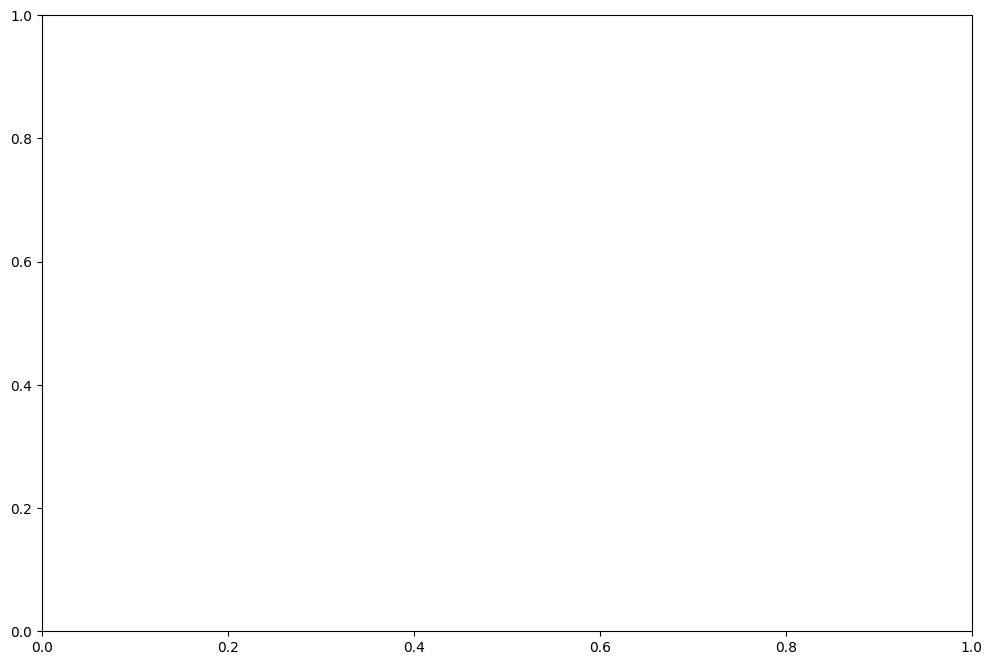

In [4]:
# Source - https://stackoverflow.com/a
# Posted by Quang Hoang
# Retrieved 2025-11-25, License - CC BY-SA 4.0

fig, ax = plt.subplots(figsize=(12,8))
(llm_score_df['mean'].unstack(level=1)
           .plot.bar(yerr=llm_score_df['std'].unstack(level=1) * 1.96,
                     ax=ax, capsize=4)
)
plt.show()


In [ ]:


prompt_variants = list(summary.keys())
context_labels = ["relevant_only", "irrelevant_only", "mixed"]

# Prepare data matrices
accuracy_matrix = []
score_matrix = []

for pv in prompt_variants:
    stats = summary[pv]
    acc_row = []
    score_row = []
    for cc in context_labels:
        if cc in stats:
            acc_row.append(stats[cc]["llm_accuracy"])
            score_row.append(stats[cc]["llm_score"])
        else:
            acc_row.append(0.0)
            score_row.append(0.0)
    accuracy_matrix.append(acc_row)
    score_matrix.append(score_row)

accuracy_matrix = np.array(accuracy_matrix)
score_matrix = np.array(score_matrix)

x = np.arange(len(prompt_variants))
width = 0.25  # width of each bar

# -------- ACCURACY PLOT --------
plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracy_matrix[:, 0], width, label="relevant_only")
plt.bar(x,          accuracy_matrix[:, 1], width, label="irrelevant_only")
plt.bar(x + width,  accuracy_matrix[:, 2], width, label="mixed")

tick_positions = x
plt.xticks(tick_positions - 0.1, prompt_variants, rotation=45)
plt.xlim(min(x) - 0.5, max(x) + 0.5)
plt.ylim(0, 1)
plt.ylabel("LLM Accuracy")
plt.title("LLM Accuracy by Prompt Variant and Context Condition")
plt.legend()
plt.tight_layout()
plt.show()

# -------- SCORE PLOT --------
plt.figure(figsize=(10, 6))
plt.bar(x - width, score_matrix[:, 0], width, label="relevant_only")
plt.bar(x,          score_matrix[:, 1], width, label="irrelevant_only")
plt.bar(x + width,  score_matrix[:, 2], width, label="mixed")

tick_positions = x
plt.xticks(tick_positions - 0.1, prompt_variants, rotation=45)
plt.xlim(min(x) - 0.5, max(x) + 0.5)
plt.ylim(0, 1)
plt.ylabel("LLM Score (0–1)")
plt.title("LLM Score by Prompt Variant and Context Condition")
plt.legend()
plt.tight_layout()
plt.show()
